In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:


cols = [ "flength","fWidtdh","fSize","fConc","fConcl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv ("magic04.data",names=cols)
df.head()

,flength,fWidtdh,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
#print(pd.read_csv("magic04.data"))

In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"]=='g').astype(int)

In [6]:
df.head()

,flength,fWidtdh,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


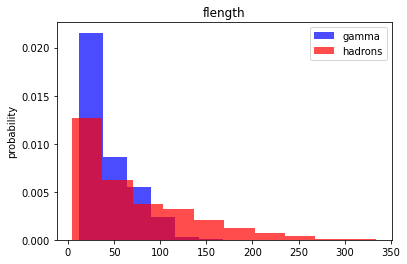

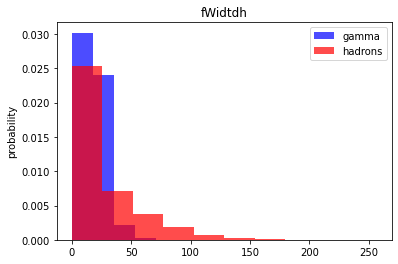

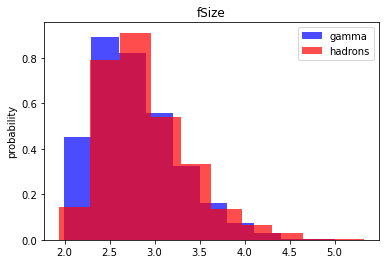

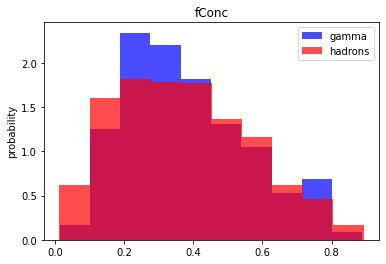

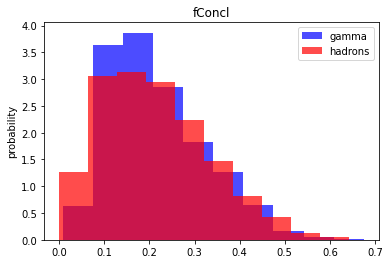

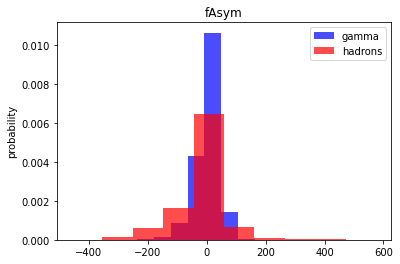

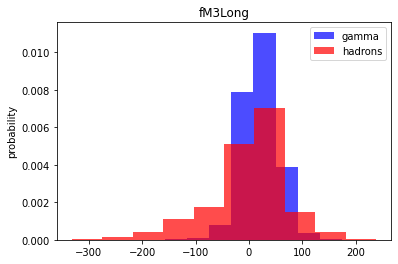

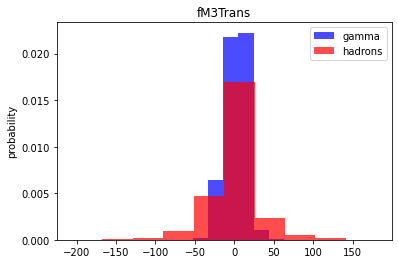

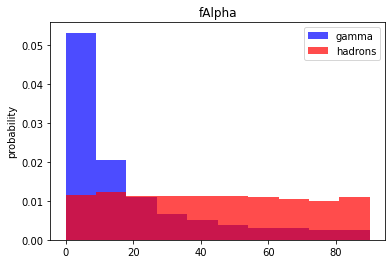

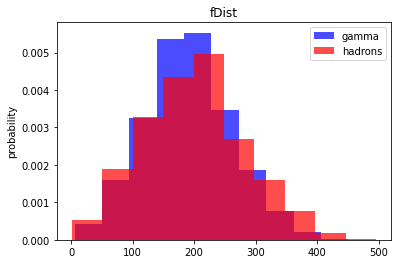

In [7]:
for label in cols [:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hadrons',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.legend()
    plt.show()


Train,validation,test Datasets

In [8]:
train,valid,test=np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))] )

due to some of the columns being too small it can affect the results...Hence we have to scale them so as they will be near the standard deviation and the mean

In [9]:
def scale_dataset(dataframe):
    x=dataframe [dataframe.cols[:-1]].values
    y=dataframe [dataframe.cols[-1]].values
    
    scaler =StandardScaler()
    x=scaler.fit_transform(x)


    data=np.hstack(x,numpy.reshape(y,(-1,1)))
    return(y,x)

    

In [10]:
train

,flength,fWidtdh,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
4761,34.9959,19.3991,2.9151,0.2772,0.1429,9.4718,-14.2932,9.2871,6.8900,203.5120,1
10803,28.2831,19.2789,2.5502,0.5408,0.2972,28.8722,21.3541,-15.6616,45.8856,160.5030,1
6657,41.3532,19.7374,2.7466,0.3692,0.2106,-45.4706,-11.5435,-17.3627,4.0900,296.4470,1
12206,21.2848,6.9088,2.1629,0.7216,0.4089,22.7552,12.8164,-6.3066,48.4705,199.8360,1
15323,48.0448,4.6115,2.8763,0.4086,0.2213,34.0513,24.3113,4.2530,40.7952,166.4561,0
...,...,...,...,...,...,...,...,...,...,...,...
10775,29.3567,16.4765,2.7796,0.4037,0.2301,17.4037,20.8865,-12.5669,7.9947,213.2020,1
15183,44.9748,23.8528,3.0476,0.2953,0.1507,23.2882,-12.4968,16.6993,30.8505,141.9516,0
8436,41.5662,17.8179,2.9243,0.2976,0.1530,-3.7194,-15.9486,8.8863,1.3140,222.8100,1
9105,28.3463,13.4075,2.4433,0.5297,0.3009,34.0842,17.2129,-12.7297,6.7850,169.6420,1


In [11]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7445
3967


from the abpve line of code we can see that the hadrons are 3997 while the gamma are 7415... so we want to oversample training data..which mean increase sample
thats where we use imblearn.over_sampling

In [12]:
def scale_dataset(dataframe , oversample=False):
    x=dataframe [dataframe.columns[:-1]].values
    y=dataframe [dataframe.columns[-1]].values
    
    scaler =StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample :
        ros= RandomOverSampler()
        x,y =ros.fit_resample(x,y)



    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x,y

    

In [13]:
train, x_train, y_train = scale_dataset(train, oversample=True)
validation, x_validation, y_validation = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [14]:
len(y_train)

14890

In [15]:
len(y_train==1)

14890

In [16]:
sum(y_train==1)

7445

In [17]:
len(y_train==0)



14890

In [18]:
sum(y_train==1)

7445

In [19]:
#df

# kNN 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred=knn_model.predict(x_test)

In [23]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [24]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1333
           1       0.86      0.88      0.87      2471

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



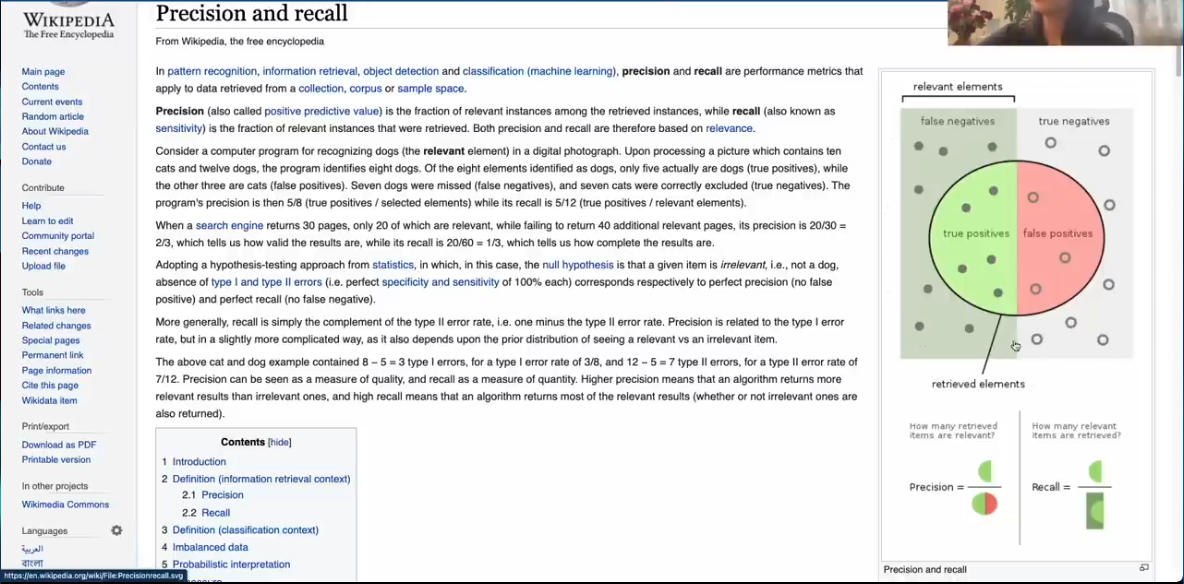


# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [28]:
y_pred=nb_model.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      1333
           1       0.74      0.91      0.82      2471

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



1.18

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [32]:
y_pred=lg_model.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1333
           1       0.84      0.82      0.83      2471

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines(SVM)

In [34]:
from sklearn.svm import SVC

In [35]:
SVM_model = SVC()
SVM_model = SVM_model.fit(x_train,y_train)

In [36]:
y_pred=SVM_model.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1333
           1       0.89      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural network

In [38]:
import tensorflow as tf

In [39]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('BInary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()



epoch means training cycles

In [40]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10, )),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                 metrics=['accuracy'])

1.55

In [41]:
history = nn_model.fit(
    x_train,y_train,epochs = 150, batch_size = 32,validation_split = 0.2
    )

Epoch 1/150
373/373 [==============================] - 3s 5ms/step - loss: 0.4555 - accuracy: 0.7823 - val_loss: 0.5147 - val_accuracy: 0.7018
Epoch 2/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8440 - val_loss: 0.5845 - val_accuracy: 0.7001
Epoch 3/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8538 - val_loss: 0.4273 - val_accuracy: 0.7968
Epoch 4/150
373/373 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8586 - val_loss: 0.5316 - val_accuracy: 0.7337
Epoch 5/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8622 - val_loss: 0.5113 - val_accuracy: 0.7518
Epoch 6/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.8643 - val_loss: 0.5035 - val_accuracy: 0.7555
Epoch 7/150
373/373 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8641 - val_loss: 0.4628 - val_accuracy: 0.7737

validation_split-fraction of the training data to be used as validation data

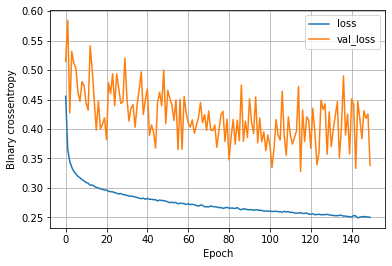

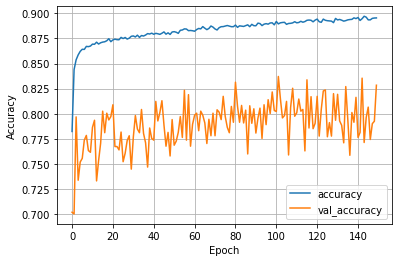

In [42]:
plot_loss(history)
plot_accuracy(history)


### Lets do a grid Search on the NN to find what happens when we use Different nodes

In [ ]:


nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10, )),
    #lets add a Drop out layer-DropOut Layer randomly chooses some nodes and chooses not to train them
    tf.keras.layers.Dropout()
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = nn_model.fit(
    x_train,y_train,epochs = 150,
      batch_size = 32,
      validation_split = 0.2,
      verbose=0
    )

Verbose dont print anything